In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

### Coding Activity 01: Plot a Sigmoid Function

* write some code to evaluate and plot the sigmoid function
* hint: you can use np.exp()

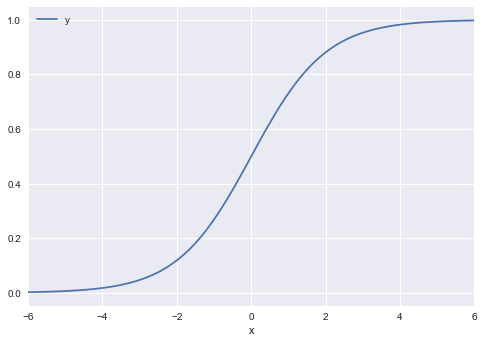

In [3]:
x = np.linspace(-6, 6, 100)

def sigmoid(x):
    return 1/(1+np.exp(-x))

y = sigmoid(x)

result = pd.DataFrame(data={'x':x, 'y': y})
result.plot(x='x', y='y');

### Coding Activity 2: Wager those odds!

In [ ]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return np.log(odds)

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return 1/(1+np.exp(-logit))

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

#### Calculate the probabilities corresponding to the above odds!

In [ ]:
for odds in odds_set:
    print odds, 

### Coding Activity 03: Logistic Regression

In [4]:
df = pd.read_csv('../data/collegeadmissions.csv')

In [5]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [6]:
df = pd.get_dummies(df, columns=['rank'], drop_first=True)

In [7]:
df.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


#### What's the bias, or prior probability for this dataset?

In [8]:
df.admit.mean()

0.3175

##### Fit a simple logistic regression with a single feature first

In [17]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm?

In [10]:
lm.fit(df[['gre']], df['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Explore the coef_ value.  Does this represent the odds or logit (log odds)?

In [11]:
lm.coef_

array([[ 0.00234884]])

In [12]:
np.exp(lm.coef_)

array([[ 1.0023516]])

##### Question: How do you interpret this number?

#### Fitting a more complex Logistic Regression

In [22]:
features = ['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4']
label = 'admit'

lm.fit(df.loc[:, features], df[label])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
print 'Coefficients:', lm.coef_
print 'Intercept:', lm.intercept_
print 'Bias:', df.admit.mean()

Coefficients: [[ 0.00180407  0.24130159 -0.605262   -1.17928556 -1.35680322]]
Intercept: [-1.85817399]
Bias: 0.3175


##### Interpreting the odds, which features have the most impact on admission rate?  Which features have the least?

In [24]:
params = {'intercept': lm.intercept_[0]}
params.update(dict(zip(features, lm.coef_[0])))
params = pd.Series(params).sort_index()
params

gpa          0.241302
gre          0.001804
intercept   -1.858174
rank_2      -0.605262
rank_3      -1.179286
rank_4      -1.356803
dtype: float64

In [25]:
np.exp(params)

gpa          1.272905
gre          1.001806
intercept    0.155957
rank_2       0.545931
rank_3       0.307498
rank_4       0.257483
dtype: float64

##### What is the accuracy of your model?

In [26]:
lm.score(df.loc[:, features], df['admit'])

0.70499999999999996

### Coding Activity 04: Kaggle Titanic & Classification Metrics

Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, \
precision_score, auc

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

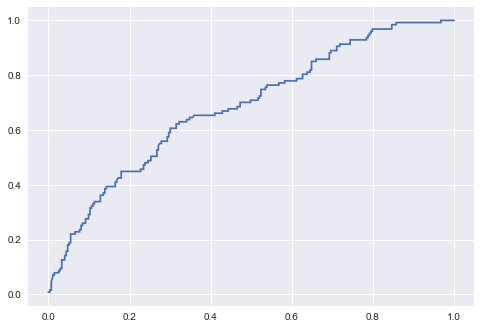

In [28]:
actuals = lm.predict(df[features]) 
probas = lm.predict_proba(df[features])
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1]);

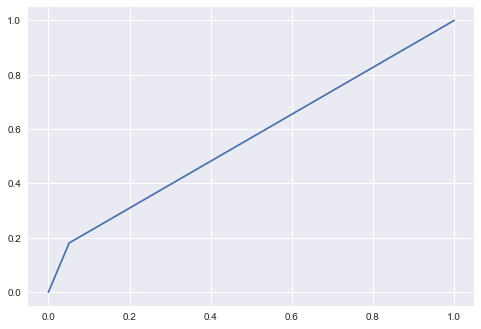

In [29]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1]);

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [30]:
roc_auc_score(df['admit'], lm.predict(df[features]))

0.5649101554613366

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

In [31]:
titanic = pd.read_csv('../data/titanic.csv')

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
